In [31]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print ('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.5
Numpy: 1.18.5
Sklearn: 0.23.1
Matplotlib: 3.2.2
Keras: 2.4.3


In [32]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [33]:
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column in our pandas DataFrame
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

# read the csv
cleveland = pd.read_csv(url, names=names)

In [34]:
# print the shape of the DataFrame, so we can see how many examples we have
print('Shape of DataFrame: {}'.format(cleveland.shape))
print(cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [35]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [36]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [37]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [39]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [40]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object

In [41]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


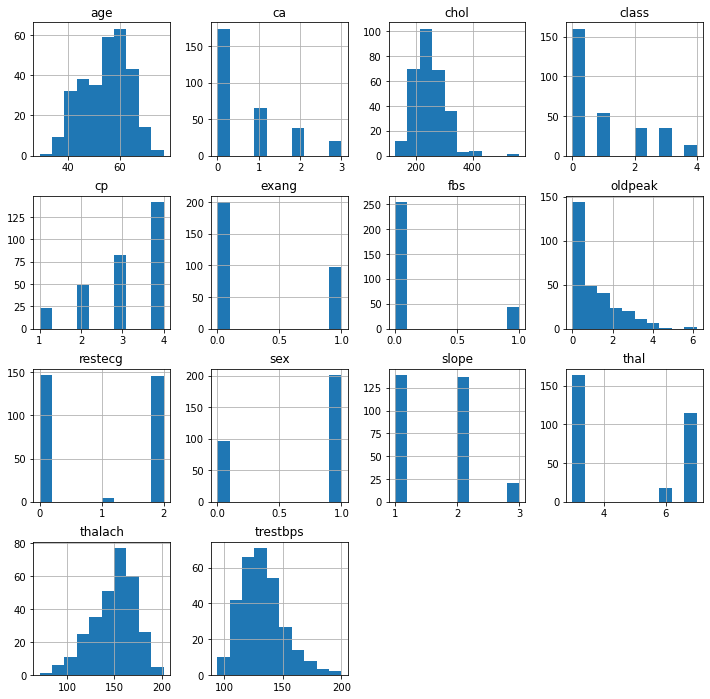

In [42]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

### 2. Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data). 

Furthermore, the class values in this dataset contain multiple types of heart disease with values ranging from 0 (healthy) to 4 (severe heart disease). Consequently, we will need to convert our class data to categorical labels. For example, the label 2 will become [0, 0, 1, 0, 0]. 

In [43]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['class'], 1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [44]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 582us/step - loss: 1.5097 - accuracy: 0.5316
Epoch 2/100
24/24 [==============================] - 0s 707us/step - loss: 1.4511 - accuracy: 0.5316
Epoch 3/100
24/24 [==============================] - 0s 499us/step - loss: 1.4160 - accuracy: 0.5316
Epoch 4/100
24/24 [==============================] - 0s 665us/step - loss: 1.3820 - accuracy: 0.5316
Epoch 5/100
24/24 [==============================] - 0s 499us/step - loss: 1.3566 - accuracy: 0.5316
Epoch 6/100
24/24 [==============================] - 0s 665us/step - loss: 1.3232 - accuracy: 0.5316
Epoch 7/100
24/24 [==============================] - 0s 623us/step - loss: 1.2970 - accuracy: 0.5316
Epoch 8/100
24/24 [==============================] - 0s 707us/step - loss: 1.2778 - accuracy: 0.5316
Epoch 9/100
24/24 [==============================] - 0s 790us/step - loss: 1.2459 - accuracy: 0.5316
Epoch 10/100
24/24 [==============================] - 0s 623us/step - loss: 1.2301 - accura

24/24 [==============================] - 0s 582us/step - loss: 0.9264 - accuracy: 0.6245
Epoch 81/100
24/24 [==============================] - 0s 582us/step - loss: 0.9382 - accuracy: 0.6160
Epoch 82/100
24/24 [==============================] - 0s 457us/step - loss: 0.9371 - accuracy: 0.6203
Epoch 83/100
24/24 [==============================] - 0s 582us/step - loss: 0.9403 - accuracy: 0.6245
Epoch 84/100
24/24 [==============================] - 0s 540us/step - loss: 0.9287 - accuracy: 0.6118
Epoch 85/100
24/24 [==============================] - 0s 416us/step - loss: 0.9258 - accuracy: 0.6245
Epoch 86/100
24/24 [==============================] - 0s 582us/step - loss: 0.9269 - accuracy: 0.6329
Epoch 87/100
24/24 [==============================] - 0s 499us/step - loss: 0.9196 - accuracy: 0.6329
Epoch 88/100
24/24 [==============================] - 0s 499us/step - loss: 0.9359 - accuracy: 0.6034
Epoch 89/100
24/24 [==============================] - 0s 873us/step - loss: 0.9239 - accuracy: 

In [47]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0]


In [48]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 [==============================] - 0s 748us/step - loss: 0.7561 - accuracy: 0.5105
Epoch 2/100
24/24 [==============================] - 0s 790us/step - loss: 0.6832 - accuracy: 0.6118
Epoch 3/100
24/24 [==============================] - 0s 540us/step - loss: 0.6792 - accuracy: 0.6498
Epoch 4/100
24/24 [==============================] - 0s 540us/step - loss: 0.6802 - accuracy: 0.5570
Epoch 5/100
24/24 [==============================] - 0s 790us/step - loss: 0.6735 - accuracy: 0.6371
Epoch 6/100
24/24 [==============================] - 0s 582us/step - loss: 0.6701 - accuracy: 0.6287
Epoch 7/100
24/24 [==============================] - 0s 665us/step - loss: 0.6648 - accuracy: 0.6751
Epoch 8/100
24/24 [==============================] - 0s 623us/step - loss: 0.6628 - accuracy: 0.6498
Epoch 9/100
24/24 [==============================] - 0s 623us/step - loss: 0.6597 - accuracy: 0.6878
Epoch 10/100
24/24 [==============================] - 0s 623us/step - loss: 0.6505 - accura

24/24 [==============================] - 0s 706us/step - loss: 0.4084 - accuracy: 0.8692
Epoch 79/100
24/24 [==============================] - 0s 582us/step - loss: 0.4077 - accuracy: 0.8481
Epoch 80/100
24/24 [==============================] - 0s 540us/step - loss: 0.4029 - accuracy: 0.8608
Epoch 81/100
24/24 [==============================] - 0s 540us/step - loss: 0.3973 - accuracy: 0.8608
Epoch 82/100
24/24 [==============================] - 0s 582us/step - loss: 0.3960 - accuracy: 0.8565
Epoch 83/100
24/24 [==============================] - 0s 748us/step - loss: 0.3982 - accuracy: 0.8650
Epoch 84/100
24/24 [==============================] - 0s 499us/step - loss: 0.3881 - accuracy: 0.8608
Epoch 85/100
24/24 [==============================] - 0s 540us/step - loss: 0.4058 - accuracy: 0.8481
Epoch 86/100
24/24 [==============================] - 0s 499us/step - loss: 0.3994 - accuracy: 0.8692
Epoch 87/100
24/24 [==============================] - 0s 582us/step - loss: 0.3984 - accuracy: 

In [50]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.6
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        34
           1       0.14      0.12      0.13         8
           2       0.00      0.00      0.00        10
           3       0.31      0.57      0.40         7
           4       0.00      0.00      0.00         1

    accuracy                           0.60        60
   macro avg       0.25      0.32      0.27        60
weighted avg       0.49      0.60      0.54        60



C:\Users\lahoa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# generate classification report using predictions for binary model 
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.8
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        34
           1       0.73      0.85      0.79        26

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60

